# Project: Bay Area Real Estate Market Analysis

### Objective

The objective of this project is to analyze the factors affecting house prices in the Bay Area by examining various parameters. We achieved this by performing web scraping of property listings on Redfin, followed by data cleaning and exploratory data analysis. Our analysis included:

- Examining the distribution of house prices in the Bay Area.
- Identifying the top and bottom cities based on the average price per square foot.
- Analyzing the distribution of property types across counties.
- Investigating how different variables impact the housing market.
- Building a model to predict Redfin estimates for Bay Area houses.
- Drawing observations and insights from our analysis.
- Through these efforts, we aimed to gain a deeper understanding of the Bay Area's housing market and the factors driving its prices.

### Data Dictionary:

- State: State of the property

- County: Area in which the property is located in

- City: City of the property

- Street: Location of the property

- Zipcode: Zip Code of the property

- Property_Type: Type of Property

- Status: Availability of property for sale

- Price: Listed price/selling price/market value for the property

- Year_Built: Year of Built

- Beds: Number of rooms in the property

- Bath: Number of baths in the property

- Sqft: Overall area in square feet

- Lot Area: Overall Lot area in square feet

- HOA: Due Homeowner’s association fee per month

- School_rating: School score measures the education standard of nearby schools

- WalkScore: Walk Score measures the walkability of any address

- Bike_Score: Bike Score measures whether an area is good for biking

- Garage_availability: Available of garage in the property

- Redfin_estimate: Property price estimate provided by Redfin

Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [2]:
df = pd.read_csv("Dataset_AfterDataCleaningFinal.csv")

In [3]:
df

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,Ca,Sonoma-county,Santa rosa,1830 leafgreen dr,95405,Single family residential,Active,750000.0,1961,3.0,2.0,1425.0,7022.0,0.0,6,58,57.0,Yes,752455.0
1,Ca,Sonoma-county,Petaluma,214 jacquelyn ln,94952,Single family residential,Active,1425000.0,2010,4.0,2.5,3141.0,7148.0,0.0,8,32,13.0,Yes,1431730.0
2,Ca,Sonoma-county,Rohnert park,4579 harmony pl,94928,Single family residential,Active,700000.0,1986,3.0,2.0,1470.0,4500.0,0.0,6,30,64.0,Yes,701179.0
3,Ca,Sonoma-county,Petaluma,1619 northstar dr,94954,Single family residential,Active,700000.0,1986,3.0,2.5,1421.0,4400.0,69.0,7,52,47.0,Yes,700119.0
4,Ca,Sonoma-county,Santa rosa,336 pythian rd,95409,Single family residential,Active,995000.0,1978,3.0,2.0,2029.0,8281.0,113.0,7,11,33.0,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,Ca,Alameda-county,Livermore,976 desconsado ave,94550,Single family residential,New,1195000.0,1978,3.0,2.0,1753.0,9500.0,0.0,7,52,77.0,Yes,1211421.0
429,Ca,Alameda-county,Hayward,2020 hill ave,94541,Single family home,Active,1298888.0,1963,4.0,3.0,2444.0,13939.2,0.0,4,67,30.0,Yes,1307848.0
430,Ca,Alameda-county,Hayward,1575 172nd ave,94541,Single family residential,New,729000.0,1949,4.0,2.5,1400.0,4400.0,0.0,3,68,31.0,Yes,732612.0
431,Ca,Alameda-county,Castro valley,5022 beacon hill dr,94552,Single family residential,New,1950000.0,1970,4.0,2.5,3194.0,10880.0,0.0,9,43,25.0,Yes,1953566.0


In [4]:
df.columns

Index(['State', 'County', 'City', 'Street', 'Zipcode', 'Property_Type',
       'Status', 'Price', 'Year_Built', 'Beds', 'Bath', 'Sqft', 'Lot Area',
       'HOA Due', 'School_rating', 'WalkScore', 'Bike_Score',
       'Garage_availability', 'Redfin_estimate'],
      dtype='object')

### Data Overview

In [5]:
df.head()

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,Ca,Sonoma-county,Santa rosa,1830 leafgreen dr,95405,Single family residential,Active,750000.0,1961,3.0,2.0,1425.0,7022.0,0.0,6,58,57.0,Yes,752455.0
1,Ca,Sonoma-county,Petaluma,214 jacquelyn ln,94952,Single family residential,Active,1425000.0,2010,4.0,2.5,3141.0,7148.0,0.0,8,32,13.0,Yes,1431730.0
2,Ca,Sonoma-county,Rohnert park,4579 harmony pl,94928,Single family residential,Active,700000.0,1986,3.0,2.0,1470.0,4500.0,0.0,6,30,64.0,Yes,701179.0
3,Ca,Sonoma-county,Petaluma,1619 northstar dr,94954,Single family residential,Active,700000.0,1986,3.0,2.5,1421.0,4400.0,69.0,7,52,47.0,Yes,700119.0
4,Ca,Sonoma-county,Santa rosa,336 pythian rd,95409,Single family residential,Active,995000.0,1978,3.0,2.0,2029.0,8281.0,113.0,7,11,33.0,Yes,0.0


Capitalizing the State Column

In [6]:
df['State'] = df['State'].str.upper()

In [7]:
df.head()

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate
0,CA,Sonoma-county,Santa rosa,1830 leafgreen dr,95405,Single family residential,Active,750000.0,1961,3.0,2.0,1425.0,7022.0,0.0,6,58,57.0,Yes,752455.0
1,CA,Sonoma-county,Petaluma,214 jacquelyn ln,94952,Single family residential,Active,1425000.0,2010,4.0,2.5,3141.0,7148.0,0.0,8,32,13.0,Yes,1431730.0
2,CA,Sonoma-county,Rohnert park,4579 harmony pl,94928,Single family residential,Active,700000.0,1986,3.0,2.0,1470.0,4500.0,0.0,6,30,64.0,Yes,701179.0
3,CA,Sonoma-county,Petaluma,1619 northstar dr,94954,Single family residential,Active,700000.0,1986,3.0,2.5,1421.0,4400.0,69.0,7,52,47.0,Yes,700119.0
4,CA,Sonoma-county,Santa rosa,336 pythian rd,95409,Single family residential,Active,995000.0,1978,3.0,2.0,2029.0,8281.0,113.0,7,11,33.0,Yes,0.0


In [8]:
df.describe()

,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Redfin_estimate
count,4.330000e+02,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.00000,433.000000,4.330000e+02
mean,1.294697e+06,1969.642032,3.489607,2.314088,1858.939954,7095.503464,11.503464,6.515012,46.26097,49.129330,1.127012e+06
std,6.144825e+05,24.512162,0.723615,0.417455,514.651866,2863.043459,35.519564,1.853520,24.21965,22.710678,6.833508e+05
min,2.990000e+05,1908.000000,2.000000,1.500000,728.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000e+00
25%,8.000000e+05,1955.000000,3.000000,2.000000,1447.000000,5225.000000,0.000000,5.000000,26.00000,34.000000,7.044870e+05
50%,1.178888e+06,1966.000000,3.000000,2.000000,1801.000000,6613.000000,0.000000,7.000000,48.00000,52.000000,1.007440e+06
75%,1.648990e+06,1986.000000,4.000000,2.500000,2192.000000,8305.000000,0.000000,8.000000,65.00000,65.000000,1.517316e+06
max,3.298000e+06,2023.000000,6.000000,3.000000,3278.000000,16552.800000,172.000000,9.000000,98.00000,97.000000,2.894846e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                433 non-null    object 
 1   County               433 non-null    object 
 2   City                 433 non-null    object 
 3   Street               433 non-null    object 
 4   Zipcode              433 non-null    object 
 5   Property_Type        433 non-null    object 
 6   Status               433 non-null    object 
 7   Price                433 non-null    float64
 8   Year_Built           433 non-null    int64  
 9   Beds                 433 non-null    float64
 10  Bath                 433 non-null    float64
 11  Sqft                 433 non-null    float64
 12  Lot Area             433 non-null    float64
 13  HOA Due              433 non-null    float64
 14  School_rating        433 non-null    int64  
 15  WalkScore            433 non-null    int

### Exploratory Data Analysis

Following are the business questions we could analyze from the gathered data from redfin

1.	What are the cities with the highest and lowest average price per square feet per county?
2.	What is the distribution of houses based on the number of bathrooms?
3.	What is the distribution of houses based on the number of bedrooms?
4.  Can you provide a report on the sales price distribution?
5.	How do walk score and bike score affect house prices?
6.	How does school rating affect house prices?
7.  Distribution of property type based on counties
8.	Is there any correlation between the different features of houses in the dataset?
9.  Build regression models to predict the prices of properties and compare your prediction with redfin's estimates and see which one is better or closer to real values.

In [10]:
df['Price_per_sqft'] = (df['Price']/df['Sqft']).round(2)
df.head()

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,Bath,Sqft,Lot Area,HOA Due,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate,Price_per_sqft
0,CA,Sonoma-county,Santa rosa,1830 leafgreen dr,95405,Single family residential,Active,750000.0,1961,3.0,2.0,1425.0,7022.0,0.0,6,58,57.0,Yes,752455.0,526.32
1,CA,Sonoma-county,Petaluma,214 jacquelyn ln,94952,Single family residential,Active,1425000.0,2010,4.0,2.5,3141.0,7148.0,0.0,8,32,13.0,Yes,1431730.0,453.68
2,CA,Sonoma-county,Rohnert park,4579 harmony pl,94928,Single family residential,Active,700000.0,1986,3.0,2.0,1470.0,4500.0,0.0,6,30,64.0,Yes,701179.0,476.19
3,CA,Sonoma-county,Petaluma,1619 northstar dr,94954,Single family residential,Active,700000.0,1986,3.0,2.5,1421.0,4400.0,69.0,7,52,47.0,Yes,700119.0,492.61
4,CA,Sonoma-county,Santa rosa,336 pythian rd,95409,Single family residential,Active,995000.0,1978,3.0,2.0,2029.0,8281.0,113.0,7,11,33.0,Yes,0.0,490.39


## 1. What are the cities with the highest and lowest average price per square feet per county?

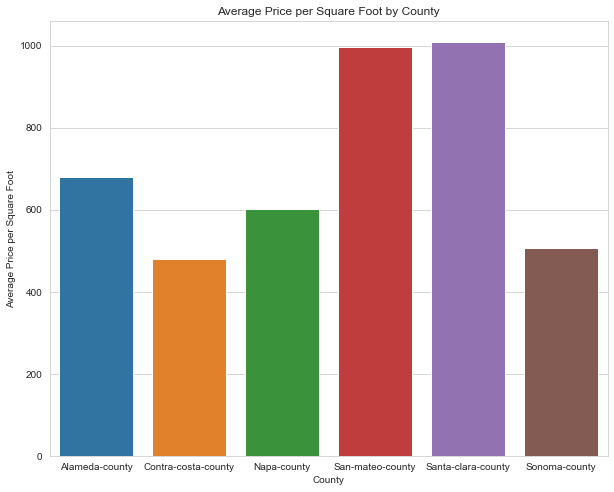

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average price per square foot for each city
county_data = df.groupby(['County'])['Price_per_sqft'].mean().reset_index()

# Create the bar plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x='County', y='Price_per_sqft', data=county_data, ax=ax)
ax.set_xlabel('County')
ax.set_ylabel('Average Price per Square Foot')
ax.set_title('Average Price per Square Foot by County')

plt.show()


#### Observation

- Santa-clara county has the highest per sqft price in the bay area which is followed closely by san-mateo county 
- Contra-costa county has the lowest per sqft price in the bay area which is less than half the price per sqft of Santa-Clara or San-Mateo counties.

## 2 & 3. What is the distribution of houses based on the number of bathrooms & bedrooms?

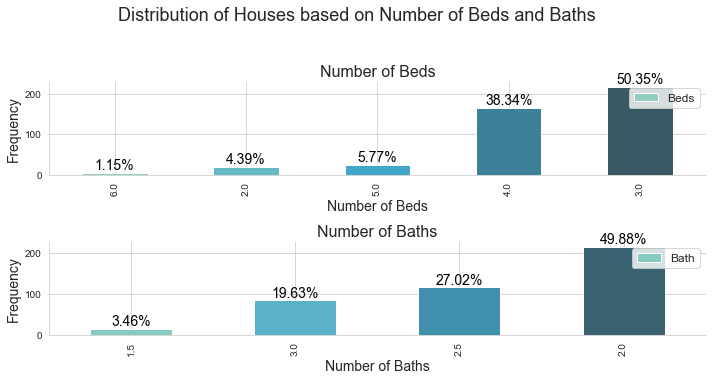

In [12]:

fig = plt.figure(figsize = (10,5))
fig.suptitle("Distribution of Houses based on Number of Beds and Baths", fontsize=18, y=1.05)

f1 = fig.add_subplot(2,1,1)
x = "Beds"
ax = df[x].value_counts().sort_values().plot(kind="bar", color=sns.color_palette("GnBu_d", len(df[x].unique())))
totals= []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_x()+i.get_width()/2, i.get_height()+.3, 
     str(round((i.get_height()/total)*100, 2))+'%', 
     ha='center', va='bottom', fontsize=14, color='black')
     ax.spines['right'].set_visible(False)
     ax.spines['top'].set_visible(False)
f1.set_title("Number of Beds", fontsize=16)
f1.set_xlabel("Number of Beds", fontsize=14)
f1.set_ylabel("Frequency", fontsize=14)
f1.legend(loc='upper right', fontsize=12)

f2 = fig.add_subplot(2,1,2)
x = "Bath"
ax = df[x].value_counts().sort_values().plot(kind="bar", color=sns.color_palette("GnBu_d", len(df[x].unique())))
totals= []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_x()+i.get_width()/2, i.get_height()+.3, 
     str(round((i.get_height()/total)*100, 2))+'%', 
     ha='center', va='bottom', fontsize=14, color='black')
     ax.spines['right'].set_visible(False)
     ax.spines['top'].set_visible(False)
f2.set_title("Number of Baths", fontsize=16)
f2.set_xlabel("Number of Baths", fontsize=14)
f2.set_ylabel("Frequency", fontsize=14)
f2.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

#### Observation

- Houses with 3 bedrooms are the most common among the listings at over 50%. Additionally, houses with 2 baths are also highly frequent in our data with almost half of all listings.
- Least in numbers are apartments with 6 bedrooms and 1.5 baths

## 4. Can you provide a report on the sales price distribution?


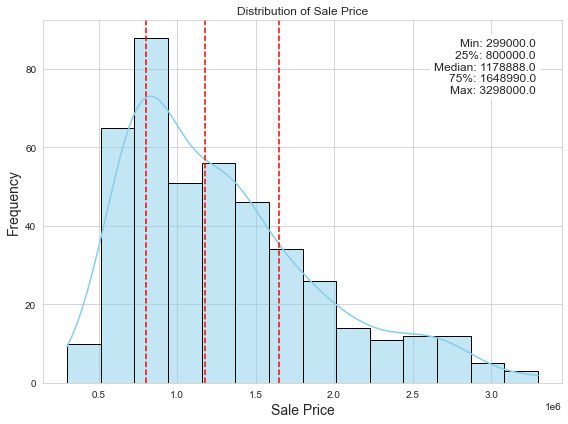

In [13]:
x = "Price"
fig, ax = plt.subplots(figsize=(8,6))
ax.title.set_text('Distribution of Sale Price')
variable = df[x].fillna(df[x].mean())
sns.histplot(variable, kde=True, color='skyblue', edgecolor='black')
des = df[x].describe()
ax.axvline(des["25%"], ls='--', color='r')
ax.axvline(des["50%"], ls='--', color='r')
ax.axvline(des["75%"], ls='--', color='r')
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("Min: "+des["min"], "25%: "+des["25%"], "Median: "+des["50%"], "75%: "+des["75%"], "Max: "+des["max"]))
ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=12, va='top',
ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
ax.set_xlabel('Sale Price', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

#### Observation

- The majority of data is concentrated towards the lower end of the distribution (more data points having lower sales prices)
- The distribution is skewed to the right.
- The upper end of the distribution has more extreme values than the lower end (some extreme higher sales prices)
- The mode is less than the median, which in turn is less than the mean.

### 5. How do walk score and bike score affect house prices?

In [14]:
#Ordinalizing WalkScore scores into categories
walkscore_desc_list = []
for t in df['WalkScore']:
    if t <= 100 and t >= 90:
        walkscore_desc_list.append('Excellent')
    elif t <= 89 and t >= 70:
        walkscore_desc_list.append('Better')
    elif t <= 69 and t >= 50:
        walkscore_desc_list.append('Good')
    elif t <= 49 and t >= 25:
        walkscore_desc_list.append('Fair')
    elif t <= 24 and t >= 0:
        walkscore_desc_list.append('Bad')
    else:
        walkscore_desc_list.append('')
df['walkscore_desc'] = walkscore_desc_list

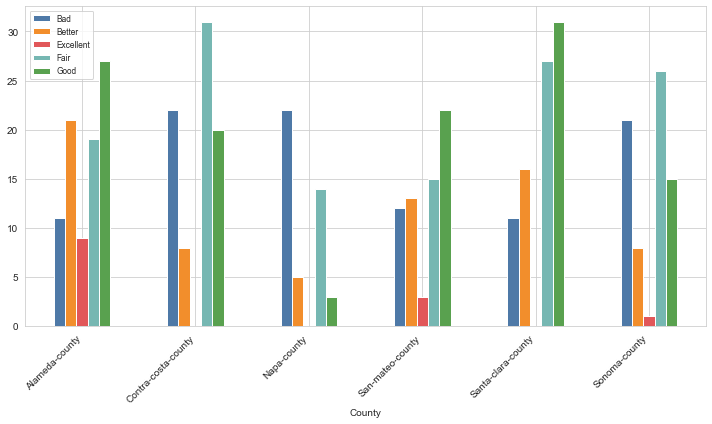

In [15]:
#Displaying walk score categories implementing Stacked Bar Plot

colors = ['#4e79a7', '#f28e2c', '#e15759', '#76b7b2', '#59a14f']
ax = pd.crosstab(df['County'], df['walkscore_desc']).plot(kind="bar", rot=0, color=colors, figsize=(10, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.legend(fontsize='small')
plt.tight_layout()
plt.show()

## Observation

- The Walkscore distribution varies significantly across counties in the region. 
- Santa Clara County has the highest frequency of Good walkscore, which indicates that it is the most walkable county in the region.
- Conversely, Napa County has the highest frequency of Bad walkscore, indicating that it is the least walkable county in the region.
- Contra Costa County has a fairly good walkscore distribution, with a significant proportion falling into the Good and Better categories. This suggests that Contra Costa County is a viable option for those who prioritize walkability in their desired neighborhood.

### 5. Finding the relationship between Walkscore and House prices

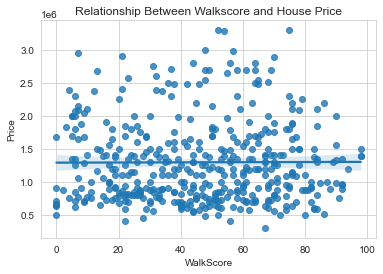

0.004694489619970249

In [16]:
# Create a scatter plot with regression line
sns.regplot(x='WalkScore', y='Price', data=df)

# Set axis labels and title
plt.xlabel('WalkScore')
plt.ylabel('Price')
plt.title('Relationship Between Walkscore and House Price')

plt.show()
corr = df['WalkScore'].corr(df['Price'])
corr



- A correlation value of 0.004694 means that there is a very weak positive correlation between Walkscore and House Price. 
- This value is close to zero, which means that there is almost no linear relationship between the variables.


In [17]:
#Ordinalizing Bike Score into categories

bikescore_desc_list = []
for t in df['Bike_Score']:
    if t <= 100 and t >= 90:
        bikescore_desc_list.append('Excellent')
    elif t <= 89 and t >= 70:
        bikescore_desc_list.append('Better')
    elif t <= 69 and t >= 50:
        bikescore_desc_list.append('Good')
    elif t <= 49 and t >= 25:
        bikescore_desc_list.append('Fair')
    elif t <= 24 and t >= 0:
        bikescore_desc_list.append('Bad')
    else:
        bikescore_desc_list.append('')
df['BikeScore_desc'] = bikescore_desc_list

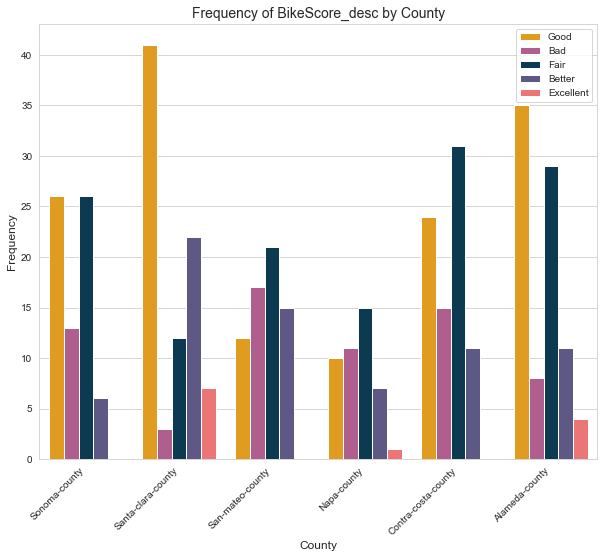

In [18]:
# Frequency of BikeScore_desc by County
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
ax = sns.countplot(x='County', hue='BikeScore_desc', data=df, palette=['#ffa600', '#bc5090', '#003f5c', '#58508d', '#ff6361'])
ax.set_xlabel('County', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend(fontsize=10)
ax.set_title('Frequency of BikeScore_desc by County', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

- Most counties have either good or fair overall bike score
- Sonoma and Contra-costa county have no properties with an exceelent bike score
- Santa-clara and Alameda counties seem most bikeable as they have higher frequencies of good and fair bike scores compared to bad bike scores

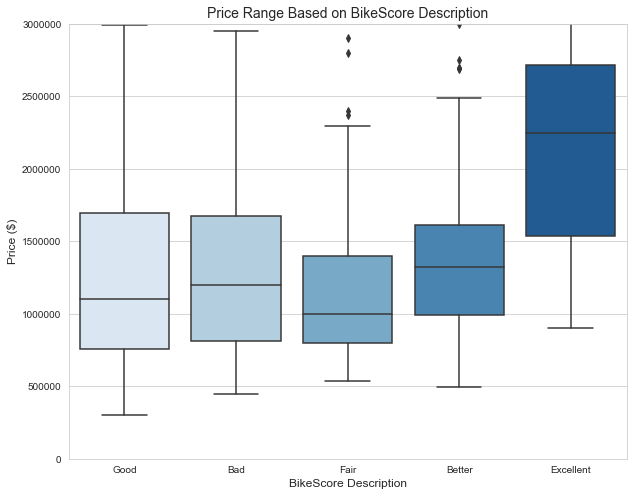

In [19]:
# The bike's price range (averaged for each county)
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
ax = sns.boxplot(x='BikeScore_desc', y='Price', data=df, palette='Blues')
ax.set_xlabel('BikeScore Description', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylim(0, 3000000)
ax.set_title('Price Range Based on BikeScore Description', fontsize=14)
plt.show()

As we can see, houses that have excellent bike score are most expensive. However, price range for all other categories of bike scores is quite similar

## 6. How does school rating affect house prices?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


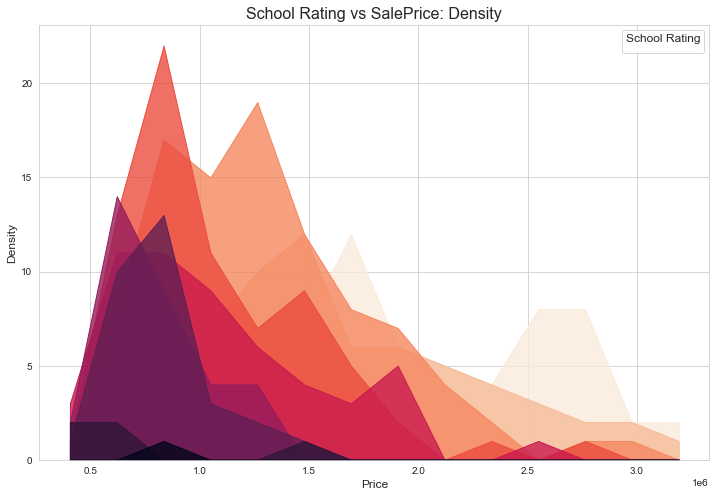

In [20]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
ax = sns.histplot(data=df, x='Price', hue='School_rating', element='poly', palette='rocket', alpha=0.8)
ax.set_xlabel('Price', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.legend(title='School Rating', fontsize=10, title_fontsize=12, loc='upper right')
ax.set_title('School Rating vs SalePrice: Density', fontsize=16)
plt.show()

- By looking at the graph, we can see that the distribution of housing prices is slightly skewed towards the higher end of the price range. 
- Additionally, we can observe that the density of the highest-rated school category is highest for lower-priced houses, while the density of the lowest-rated school category is highest for higher-priced houses. 
- This suggests that lower-rated schools tend to be located in areas with higher-priced houses, while higher-rated schools tend to be located in areas with lower-priced houses.

### Dividing the school rating into three groups to improve the readability of the graph

In [21]:
bins= [0,3,6,10]
labels = ['bad','good','excellent']
df['school_rating_group'] = pd.cut(df['School_rating'], bins=bins, labels=labels, right=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   State                433 non-null    object  
 1   County               433 non-null    object  
 2   City                 433 non-null    object  
 3   Street               433 non-null    object  
 4   Zipcode              433 non-null    object  
 5   Property_Type        433 non-null    object  
 6   Status               433 non-null    object  
 7   Price                433 non-null    float64 
 8   Year_Built           433 non-null    int64   
 9   Beds                 433 non-null    float64 
 10  Bath                 433 non-null    float64 
 11  Sqft                 433 non-null    float64 
 12  Lot Area             433 non-null    float64 
 13  HOA Due              433 non-null    float64 
 14  School_rating        433 non-null    int64   
 15  WalkScore            43

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


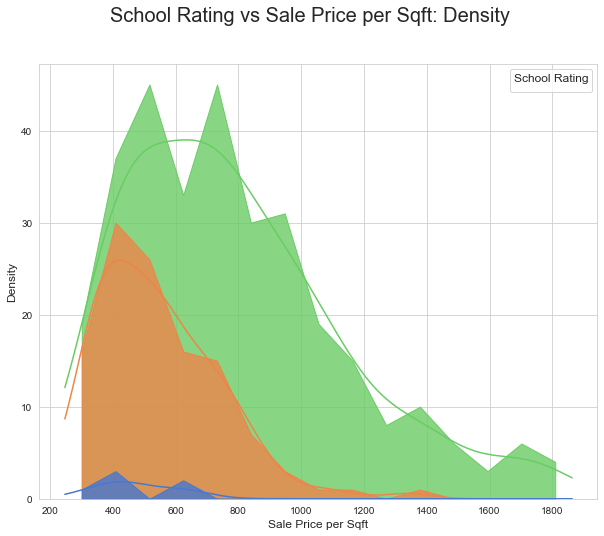

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle("School Rating vs Sale Price per Sqft: Density", fontsize=20)
sns.histplot(data=df, x="Price_per_sqft", hue="school_rating_group", element="poly", kde=True, alpha=0.8, palette="muted")
ax.set_xlabel("Sale Price per Sqft", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.legend(title="School Rating", title_fontsize=12, fontsize=10)
plt.show()

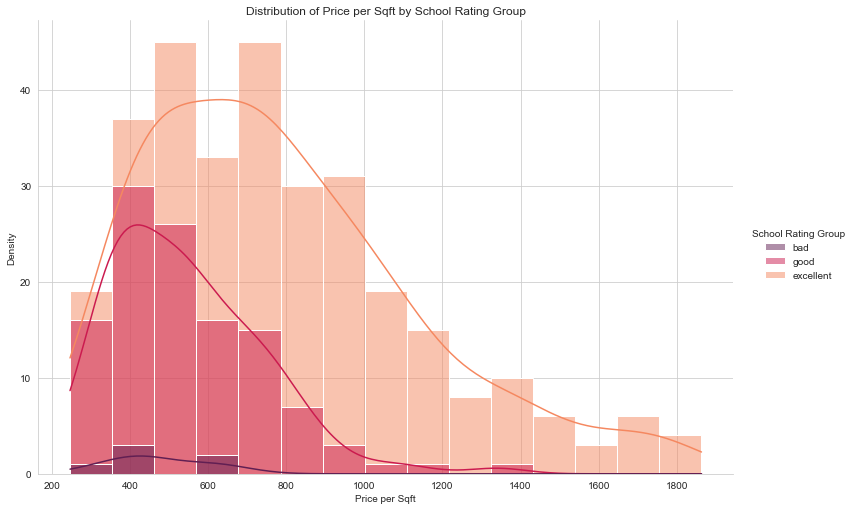

In [23]:
cat, num = "school_rating_group", "Price_per_sqft"
g = sns.displot(data=df, x=num, hue=cat, kde=True, alpha=0.5, height=7, aspect=1.5, palette="rocket")
g.set(title="Distribution of Price per Sqft by School Rating Group", xlabel="Price per Sqft", ylabel="Density")
g._legend.set(title="School Rating Group")
plt.show()

### Observation:
- The prices of houses will vary based on the school rating group they fall into. Generally, houses in the "Excellent" school rating group will have the highest prices, followed by the "Good" group, and then the "Bad" group.
- School ratings on a scale of 0-10 will be categorized into three groups: "Bad", "Good", and "Excellent".
- School rating is an important variable in determining house prices, as houses in areas with better schools are typically more desirable and command higher prices.

### 7. Distribution of property type based on counties

#### Categorizing the status of real estate properties into three categories based on their status label.

In [24]:
Property_Type_Category =[]
for i in df['Property_Type']:
    if i in ['Single family','Single family home', 'Single family residence',
                'Single family residential','Single-wide mobile home']:
        Property_Type_Category.append('Single')
        
    elif i in ['Residential', 'Residential, townhouse', 'Townhouse']:
        Property_Type_Category.append('Residential')
        
    elif i in ['Cabin', 'Co-op', 'Condo', 'Condo/co-op']:
        Property_Type_Category.append('Condo')
        
    else :
        Property_Type_Category.append('Others')

In [25]:
df['Property_Type_Category'] =Property_Type_Category
df.head()

,State,County,City,Street,Zipcode,Property_Type,Status,Price,Year_Built,Beds,...,School_rating,WalkScore,Bike_Score,Garage_availability,Redfin_estimate,Price_per_sqft,walkscore_desc,BikeScore_desc,school_rating_group,Property_Type_Category
0,CA,Sonoma-county,Santa rosa,1830 leafgreen dr,95405,Single family residential,Active,750000.0,1961,3.0,...,6,58,57.0,Yes,752455.0,526.32,Good,Good,excellent,Single
1,CA,Sonoma-county,Petaluma,214 jacquelyn ln,94952,Single family residential,Active,1425000.0,2010,4.0,...,8,32,13.0,Yes,1431730.0,453.68,Fair,Bad,excellent,Single
2,CA,Sonoma-county,Rohnert park,4579 harmony pl,94928,Single family residential,Active,700000.0,1986,3.0,...,6,30,64.0,Yes,701179.0,476.19,Fair,Good,excellent,Single
3,CA,Sonoma-county,Petaluma,1619 northstar dr,94954,Single family residential,Active,700000.0,1986,3.0,...,7,52,47.0,Yes,700119.0,492.61,Good,Fair,excellent,Single
4,CA,Sonoma-county,Santa rosa,336 pythian rd,95409,Single family residential,Active,995000.0,1978,3.0,...,7,11,33.0,Yes,0.0,490.39,Bad,Fair,excellent,Single


In [26]:
g = pd.crosstab(df['County'],df['Property_Type_Category'])
g

Property_Type_Category,Condo,Others,Single
County,,,
Alameda-county,0,6,81
Contra-costa-county,0,1,80
Napa-county,0,0,44
San-mateo-county,0,4,61
Santa-clara-county,0,3,82
Sonoma-county,1,2,68


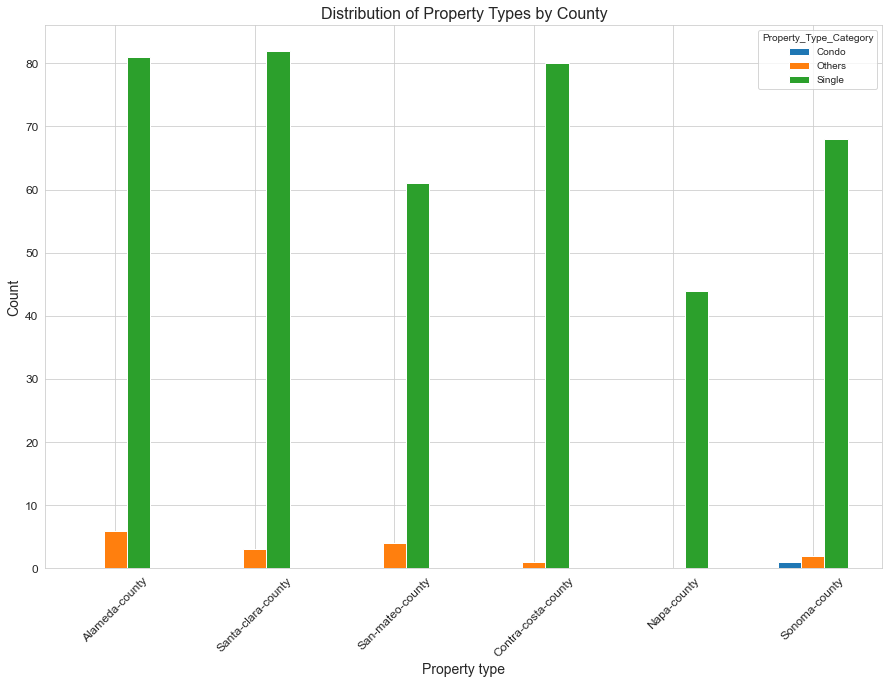

In [27]:
# Define the counties and unique property types to plot
counties = ['Alameda-county', 'Santa-clara-county', 'San-mateo-county',
            'Contra-costa-county', 'Napa-county', 'Sonoma-county']
unique_props = ['Condo', 'Others', 'Single']

# Select the rows and columns to plot from the DataFrame 'g'
plot_data = g.loc[counties, unique_props]

# Create a bar plot with the selected data
plot = plot_data.plot(kind='bar', figsize=(15, 10))

# Set the axis labels, title and ticks
plot.set_xlabel('Property type', fontsize=14)
plot.set_ylabel('Count', fontsize=14)
plot.set_title('Distribution of Property Types by County', fontsize=16)
plot.tick_params(axis='x', labelsize=12, rotation=45)
plot.tick_params(axis='y', labelsize=12)

# Show the plot
plt.show()


### Observation:

- The chart depicts the distribution of property type categories across the 6 counties.
- Majority of the houses in all the counties are Single Family homes.

### Analyzing the Distribution of property status  across Counties

In [28]:
Status_Category =[]
for i in df['Status']:
    if i in ['Active','Price change']:
     
        Status_Category.append('Active')
        
    elif i in ['Coming soon', 'New']:
        Status_Category.append('Coming soon')
        
    else:
        Status_Category.append('Pending')
        

In [29]:
df['Status_Category'] = Status_Category

In [30]:
status_desc = pd.crosstab(df['County'],df['Status_Category'])
status_desc

Status_Category,Active,Coming soon,Pending
County,,,
Alameda-county,15,71,1
Contra-costa-county,14,67,0
Napa-county,44,0,0
San-mateo-county,63,2,0
Santa-clara-county,84,1,0
Sonoma-county,71,0,0


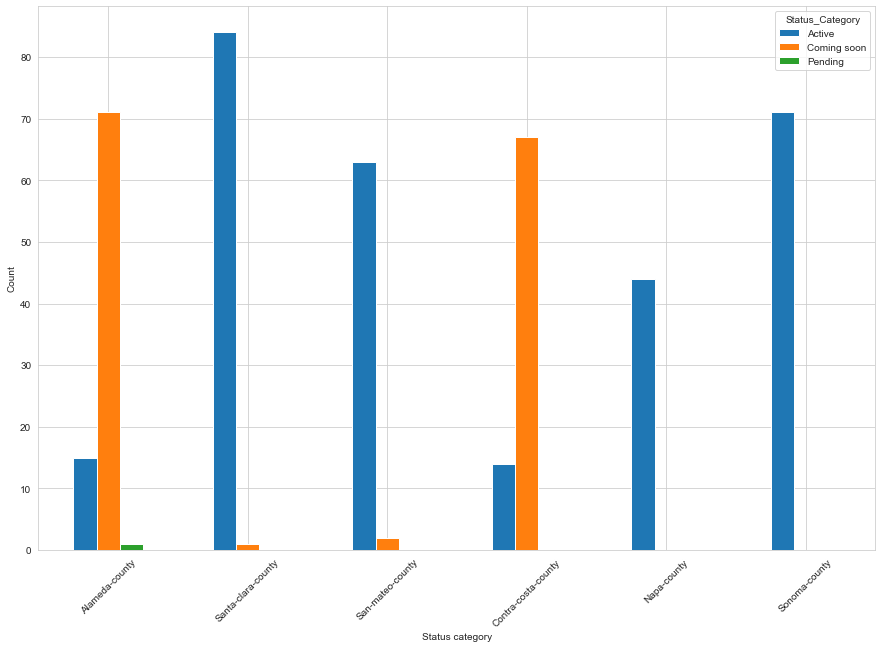

In [31]:
County_5 = ['Alameda-county', 'Santa-clara-county', 'San-mateo-county',
            'Contra-costa-county', 'Napa-county', 'Sonoma-county']
unique_t = ['Active','Coming soon','Pending']
status_desc.loc[County_5, unique_t].plot.bar(figsize=(15,10))
plt.xlabel('Status category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Observation
- The bar chart displays the distribution of property status in 6 counties in California.
- The majority of properties in all counties are "Active" for sale except for Alameda and Contra-costa counties where there are more properties "Coming Soon". "Pending" properties are the least common.
- The chart shows that the highest number of "Active" properties are in Santa Clara County, followed by San Mateo County and Sonama County.

# 8. Correlation between features and regression

### Objective: Predicting house prices using regression and evaluating the accuracy by comparing them with Redfin's estimated prices.

In [33]:
reg_data = df[['Year_Built', 'Beds', 'Bath', 'Sqft', 'Lot Area',
       'School_rating', 'WalkScore', 'Bike_Score', 'Garage_availability',
       'Redfin_estimate','Property_Type_Category', 'Status_Category']] # Filter out the unwanted variables from the dataframe

In [34]:
reg_data = pd.get_dummies(reg_data, drop_first = True) # Create dummy variables

#### Splitting the data into training and testing

In [35]:
## split data
df_train, df_test = model_selection.train_test_split(reg_data, 
                      test_size=0.3)
## print info
print("X_train shape:", df_train.drop("Redfin_estimate",axis=1).shape, "| X_test shape:", df_test.drop("Redfin_estimate",axis=1).shape)
print("y_train mean:", round(np.mean(df_train["Redfin_estimate"]),2), "| y_test mean:", round(np.mean(df_test["Redfin_estimate"]),2))
print(df_train.shape[1], "features:", df_train.drop("Redfin_estimate",axis=1).columns.to_list())

X_train shape: (303, 13) | X_test shape: (130, 13)
y_train mean: 1134379.86 | y_test mean: 1109839.92
14 features: ['Year_Built', 'Beds', 'Bath', 'Sqft', 'Lot Area', 'School_rating', 'WalkScore', 'Bike_Score', 'Garage_availability_Yes', 'Property_Type_Category_Others', 'Property_Type_Category_Single', 'Status_Category_Coming soon', 'Status_Category_Pending']


In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 118 to 421
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year_Built                     303 non-null    int64  
 1   Beds                           303 non-null    float64
 2   Bath                           303 non-null    float64
 3   Sqft                           303 non-null    float64
 4   Lot Area                       303 non-null    float64
 5   School_rating                  303 non-null    int64  
 6   WalkScore                      303 non-null    int64  
 7   Bike_Score                     303 non-null    float64
 8   Redfin_estimate                303 non-null    float64
 9   Garage_availability_Yes        303 non-null    uint8  
 10  Property_Type_Category_Others  303 non-null    uint8  
 11  Property_Type_Category_Single  303 non-null    uint8  
 12  Status_Category_Coming soon    303 non-null    u

#### We can see that all the values are now numeric and hence can proceed further with the analysis

### Data-Scaling to make it Regresssion-ready

In [37]:
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(df_train.drop("Redfin_estimate", axis=1))
df_train_scaled= pd.DataFrame(X, columns=df_train.drop("Redfin_estimate", 
                        axis=1).columns, index=df_train.index)
## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
df_train_scaled['Redfin_estimate'] = scalerY.fit_transform(df_train['Redfin_estimate'].values.reshape(-1,1))
df_train_scaled.head()

,Year_Built,Beds,Bath,Sqft,Lot Area,School_rating,WalkScore,Bike_Score,Garage_availability_Yes,Property_Type_Category_Others,Property_Type_Category_Single,Status_Category_Coming soon,Status_Category_Pending,Redfin_estimate
118,-0.448276,0.0,2.0,0.241672,1.074375,-0.333333,-0.205128,0.000000,0.0,0.0,0.0,0.0,0.0,1.909810
45,0.206897,-1.0,-1.0,-1.175702,-1.653767,-1.000000,0.564103,0.419355,-1.0,0.0,-1.0,0.0,0.0,-0.932552
309,0.931034,0.0,1.0,-0.007838,-1.314541,-1.333333,-0.128205,-0.580645,0.0,0.0,0.0,1.0,0.0,-0.522222
162,-0.034483,1.0,1.0,0.653168,-0.183787,0.333333,-0.333333,0.451613,0.0,0.0,0.0,0.0,0.0,1.748698
314,0.206897,0.0,0.0,0.043109,2.705526,0.666667,-0.435897,-0.774194,0.0,0.0,0.0,1.0,0.0,0.372459


In [38]:
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(df_test.drop("Redfin_estimate", axis=1))
df_test_scaled= pd.DataFrame(X, columns=df_test.drop("Redfin_estimate", 
                        axis=1).columns, index=df_test.index)
## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
df_test_scaled['Redfin_estimate'] = scalerY.fit_transform(df_test['Redfin_estimate'].values.reshape(-1,1))
df_test_scaled.head()

,Year_Built,Beds,Bath,Sqft,Lot Area,School_rating,WalkScore,Bike_Score,Garage_availability_Yes,Property_Type_Category_Others,Property_Type_Category_Single,Status_Category_Coming soon,Status_Category_Pending,Redfin_estimate
57,0.935065,1.0,0.5,-0.218963,-0.808436,-0.833333,-0.341463,-0.171875,0.0,0.0,0.0,0.0,0.0,-0.370316
190,-0.389610,1.0,-0.5,-0.243520,-0.453800,-0.166667,0.024390,0.546875,0.0,0.0,0.0,0.0,0.0,0.002899
175,-0.389610,0.0,-0.5,-0.843793,0.437565,0.500000,-0.780488,-0.359375,0.0,0.0,0.0,0.0,0.0,1.662552
120,-0.181818,3.0,1.5,0.853342,-0.039952,0.500000,0.439024,0.265625,0.0,0.0,0.0,0.0,0.0,1.209385
0,-0.129870,0.0,-0.5,-0.591405,0.189893,-0.166667,0.146341,0.015625,0.0,0.0,0.0,0.0,0.0,-0.291246


### Correlation Matrix

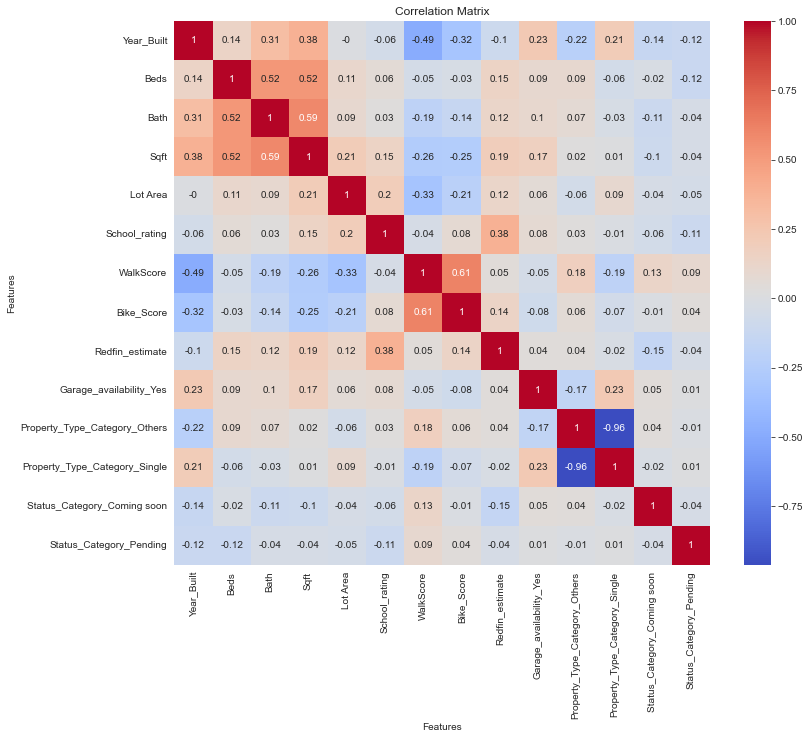

In [39]:
correlation_matrix = df_train.corr().round(2)

# create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 10))

# create the heatmap using seaborn library
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', ax=ax)

# set the title and axis labels
ax.set_title('Correlation Matrix')
ax.set_xlabel('Features')
ax.set_ylabel('Features')

# show the plot
plt.show()


### Observation:
- There is a very strong negative correlation between property type - others and property type - single which means that if a property belongs to the others category it is almost certain that it cannot belong to the single category
- Comparitively stronger positive correlation is observed between walk score and bike score. This suggests that if a property has good walk score it is likely it will also have a good bike score and vice-versa.
- No significant correlation can be seen among any other variables.


In [40]:
X_names = ['Year_Built', 'Beds', 'Bath', 'Sqft', 'Lot Area', 'School_rating', 'WalkScore', 'Bike_Score', 'Garage_availability_Yes','Property_Type_Category_Others','Property_Type_Category_Single', 'Status_Category_Coming soon','Status_Category_Pending']
X_train = df_train_scaled[X_names].values
y_train = df_train_scaled["Redfin_estimate"].values
X_test = df_test_scaled[X_names].values
y_test = df_test_scaled["Redfin_estimate"].values
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(303, 13)
(303,)
(130, 13)
(130,)


#### Analyzing the Regression model with K fold cross validation

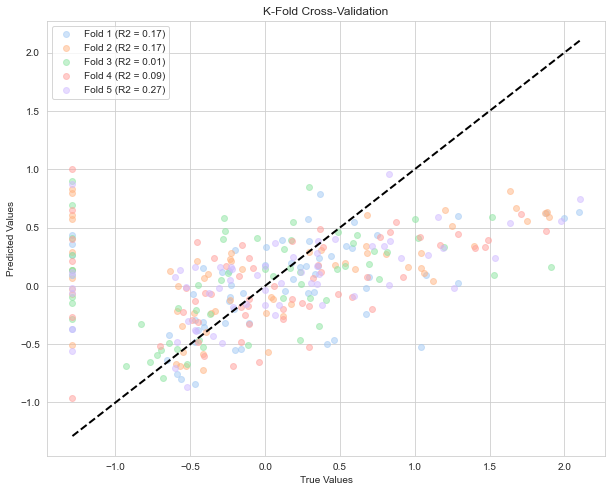

In [41]:
# Call model
model = linear_model.LinearRegression()

# K-fold cross-validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)

# Create figure object
fig, ax = plt.subplots(figsize=(10, 8))

# Iterate through each fold of cross-validation
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    prediction = model.fit(X_train[train], y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)

    # Scatter plot of predicted vs. true values for each fold
    ax.scatter(true, prediction, color=sns.color_palette("pastel")[i], alpha=0.5, label='Fold %d (R2 = %0.2f)' % (i+1, score))

# Plot a line representing perfect prediction
ax.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', lw=2, color='black')

# Set axis labels, title, and legend
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')
ax.set_title('K-Fold Cross-Validation')
ax.legend()

# Show plot
plt.show()


In [42]:
## train
model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)


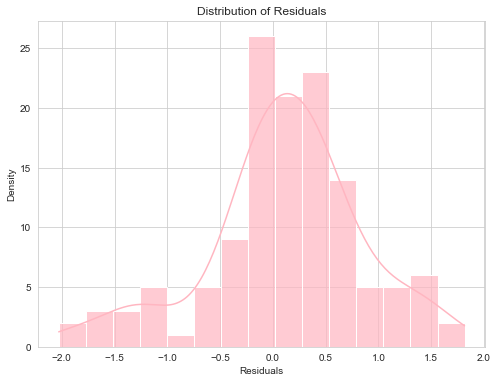

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - predicted

# Create a figure object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot residuals using a histogram with a KDE plot overlaid
sns.histplot(data=residuals, kde=True, color='#FFB6C1', alpha=0.7, ax=ax)

# Set axis labels and title
ax.set_xlabel('Residuals')
ax.set_ylabel('Density')
ax.set_title('Distribution of Residuals')

# Show plot
plt.show()


- We can see that the plot of Residual vs density is a bell shaped distribution

In [44]:
#actual vs predicted and errors
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
print(df_pred.head())
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,predicted)) 
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,predicted)) 
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_absolute_error(y_test,predicted)))
print('Variance Score: ', metrics.explained_variance_score(y_test,predicted))

     Actual  Predicted
0 -0.370316  -0.371877
1  0.002899   0.182997
2  1.662552   0.191905
3  1.209385   0.781719
4 -0.291246  -0.030939
Mean Absolute Error:  0.5604250946915329
Mean Squared Error:  0.5618886364735385
Root Mean Squared Error:  0.7486154518118985
Variance Score:  0.24301817574572926


### Linear regression with important features

    IMPORTANCE                       VARIABLE
3     0.227730                           Sqft
5     0.189278                  School_rating
0     0.159512                     Year_Built
7     0.147408                     Bike_Score
4     0.104708                       Lot Area
6     0.092056                      WalkScore
11    0.031137    Status_Category_Coming soon
2     0.021941                           Bath
1     0.017188                           Beds
8     0.009043        Garage_availability_Yes
9     0.000000  Property_Type_Category_Others
10    0.000000  Property_Type_Category_Single
12    0.000000        Status_Category_Pending


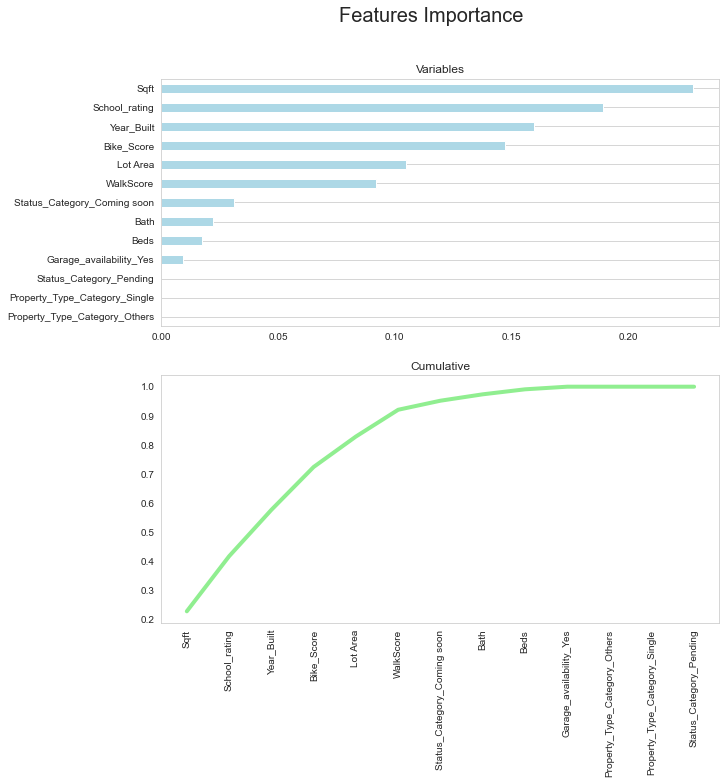

In [45]:
X = df_train.drop("Redfin_estimate", axis=1).values
y = df_train["Redfin_estimate"].values
feature_names = df_train.drop("Redfin_estimate", axis=1).columns.tolist()

# call model
model = ensemble.GradientBoostingRegressor()

# Importance
model.fit(X,y)
importances = model.feature_importances_

# Put in a pandas dtf
df_importances = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE":feature_names}).sort_values("IMPORTANCE", ascending=False)

# Print the table
print(df_importances)

# Cumulative sum
df_importances['cumsum'] = df_importances['IMPORTANCE'].cumsum(axis=0)
df_importances = df_importances.set_index("VARIABLE")

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle("Features Importance", fontsize=20)

# Plot the feature importances
df_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax1, color='lightblue')
ax1.set(title='Variables', ylabel="")
ax1.grid(axis='x')

# Plot the cumulative importance
df_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax2, color='lightgreen')
ax2.set(title='Cumulative', xlabel="", xticks=np.arange(len(df_importances)), xticklabels=df_importances.index, ylabel="")
ax2.grid(axis='both')
ax2.set_xticklabels(df_importances.index, rotation=90)

plt.show()


#### Building regression model with important features

In [46]:
X_names = ['Year_Built', 'Sqft', 'Lot Area', 'School_rating', 'WalkScore', 'Bike_Score']
X_train = df_train_scaled[X_names].values
y_train = df_train_scaled["Redfin_estimate"].values
X_test = df_test_scaled[X_names].values
y_test = df_test_scaled["Redfin_estimate"].values

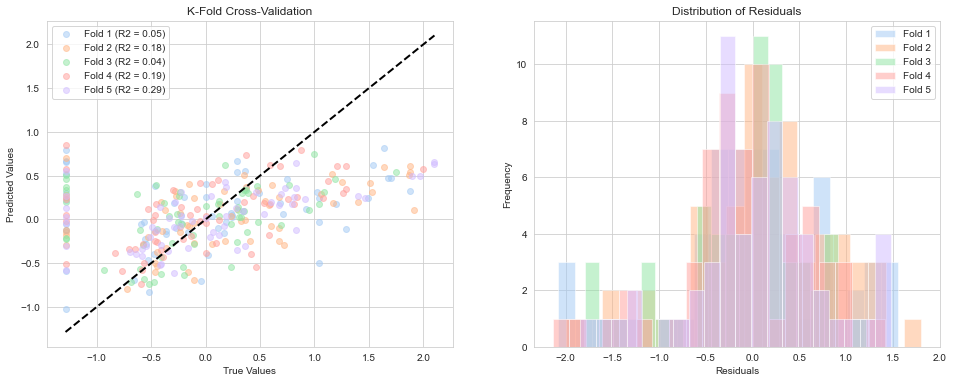

In [47]:
# Call model
model = linear_model.LinearRegression()

# K-fold cross-validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)

# Create figure object
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# Iterate through each fold of cross-validation
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    prediction = model.fit(X_train[train], y_train[train]).predict(X_train[test])
    true = y_train[test]
    residuals = true - prediction
    score = metrics.r2_score(true, prediction)
    scores.append(score)

    # Scatter plot of predicted vs. true values for each fold
    ax1.scatter(true, prediction, color=sns.color_palette("pastel")[i], alpha=0.5, label='Fold %d (R2 = %0.2f)' % (i+1, score))

    # Histogram of residuals for each fold
    ax2.hist(residuals, bins=20, alpha=0.5, color=sns.color_palette("pastel")[i], label='Fold %d' % (i+1))

# Plot a line representing perfect prediction
ax1.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', lw=2, color='black')

# Set axis labels, title, and legend
ax1.set_xlabel('True Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('K-Fold Cross-Validation')
ax1.legend()

ax2.set_xlabel('Residuals')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Residuals')
ax2.legend()

# Show plot
plt.show()



In [48]:
## train
model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)

/Users/megh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


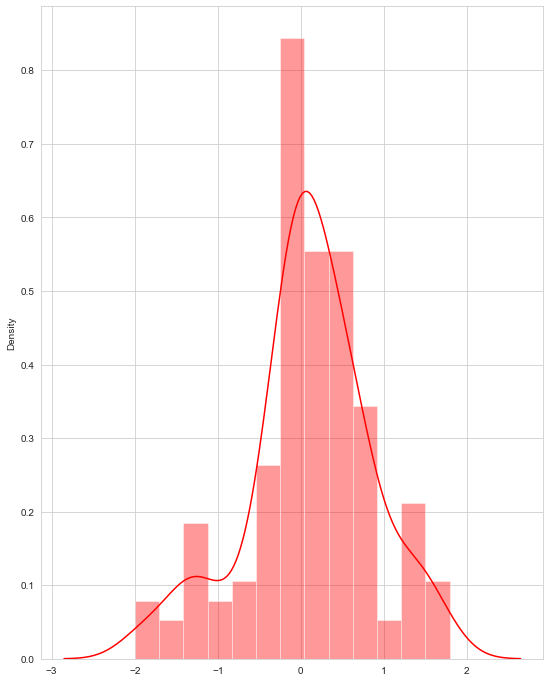

In [49]:

sns.set_palette("pastel")

# plotting residuals graph 
fig = plt.figure(figsize=(9,12))
residuals = (y_test - predicted)
sns.distplot(residuals, color='red')
plt.show()

In [50]:
#actual vs predicted and errors
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
print(df_pred.head())
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,predicted)) 
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,predicted)) 
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_absolute_error(y_test,predicted)))
print('Variance Score: ', metrics.explained_variance_score(y_test,predicted))

     Actual  Predicted
0 -0.370316  -0.470579
1  0.002899   0.101157
2  1.662552   0.124785
3  1.209385   0.603783
4 -0.291246  -0.099002
Mean Absolute Error:  0.557965748976256
Mean Squared Error:  0.5739673493671914
Root Mean Squared Error:  0.7469710496239168
Variance Score:  0.22446141447930046


### Random Forest regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
 # create regressor object
regressor1 = RandomForestRegressor(n_estimators = 200, n_jobs=-1,random_state = 0)
X_names = ['Year_Built', 'Sqft', 'Lot Area', 'School_rating', 'WalkScore', 'Bike_Score']
X_train1 = df_train_scaled[X_names].values
y_train1 = df_train_scaled["Redfin_estimate"].values
X_test1 = df_test_scaled[X_names].values
y_test1 = df_test_scaled["Redfin_estimate"].values
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# fit the regressor with x and y data
regressor1.fit(X_train, y_train)  

## test
predicted1 = regressor1.predict(X_test)

(303, 6)
(303,)
(130, 6)
(130,)


In [59]:
#actual vs predicted and errors
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':predicted1})
print(df_pred.head())
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,predicted1)) 
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,predicted1)) 
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_absolute_error(y_test,predicted1)))
print('Variance Score: ', metrics.explained_variance_score(y_test,predicted1))

     Actual  Predicted
0 -0.370316  -0.432960
1  0.002899   0.100505
2  1.662552   0.179366
3  1.209385   0.989429
4 -0.291246  -0.324803
Mean Absolute Error:  0.570514268484601
Mean Squared Error:  0.6102948731550221
Root Mean Squared Error:  0.755323949365172
Variance Score:  0.19934419032510775


In [60]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # Ensure that the number of features in predictors matches the number of features expected by the model
    if predictors.shape[1] != model.coef_.shape[0]:
        raise ValueError(f"Model expected {model.coef_.shape[0]} features, but {predictors.shape[1]} were given.")

    # predicting using the independent variables
    pred = model.predict(predictors[:,model.coef_ != 0])

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors[:,model.coef_ != 0], target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

X_names = ['Year_Built', 'Sqft', 'Lot Area', 'School_rating', 'WalkScore', 'Bike_Score']
X_train1 = df_train_scaled[X_names].values
y_train1 = df_train_scaled["Redfin_estimate"].values
X_test1 = df_test_scaled[X_names].values
y_test1 = df_test_scaled["Redfin_estimate"].values

# fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [61]:
X_test.shape

(130, 6)

In [62]:
X_train.shape

(303, 6)

In [63]:
performance_test = model_performance_regression(model, X_test, y_test)
print(performance_test)

       RMSE       MAE  R-squared  Adj. R-squared
0  0.757606  0.557966    0.21001        0.171474


In [64]:
performance_test = model_performance_regression(model, X_train, y_train)
print(performance_test)

       RMSE       MAE  R-squared  Adj. R-squared
0  0.725603  0.541049   0.201244        0.185053


The differences in the metrics between training and test data are relatively small, therefore the model can be said to be performing well overall.